- The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.                                                                                              

- Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\gas_turbines.csv")
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

## EDA

In [4]:
df.shape

(15039, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [8]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [9]:
df.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

### Visualization of data

In [10]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

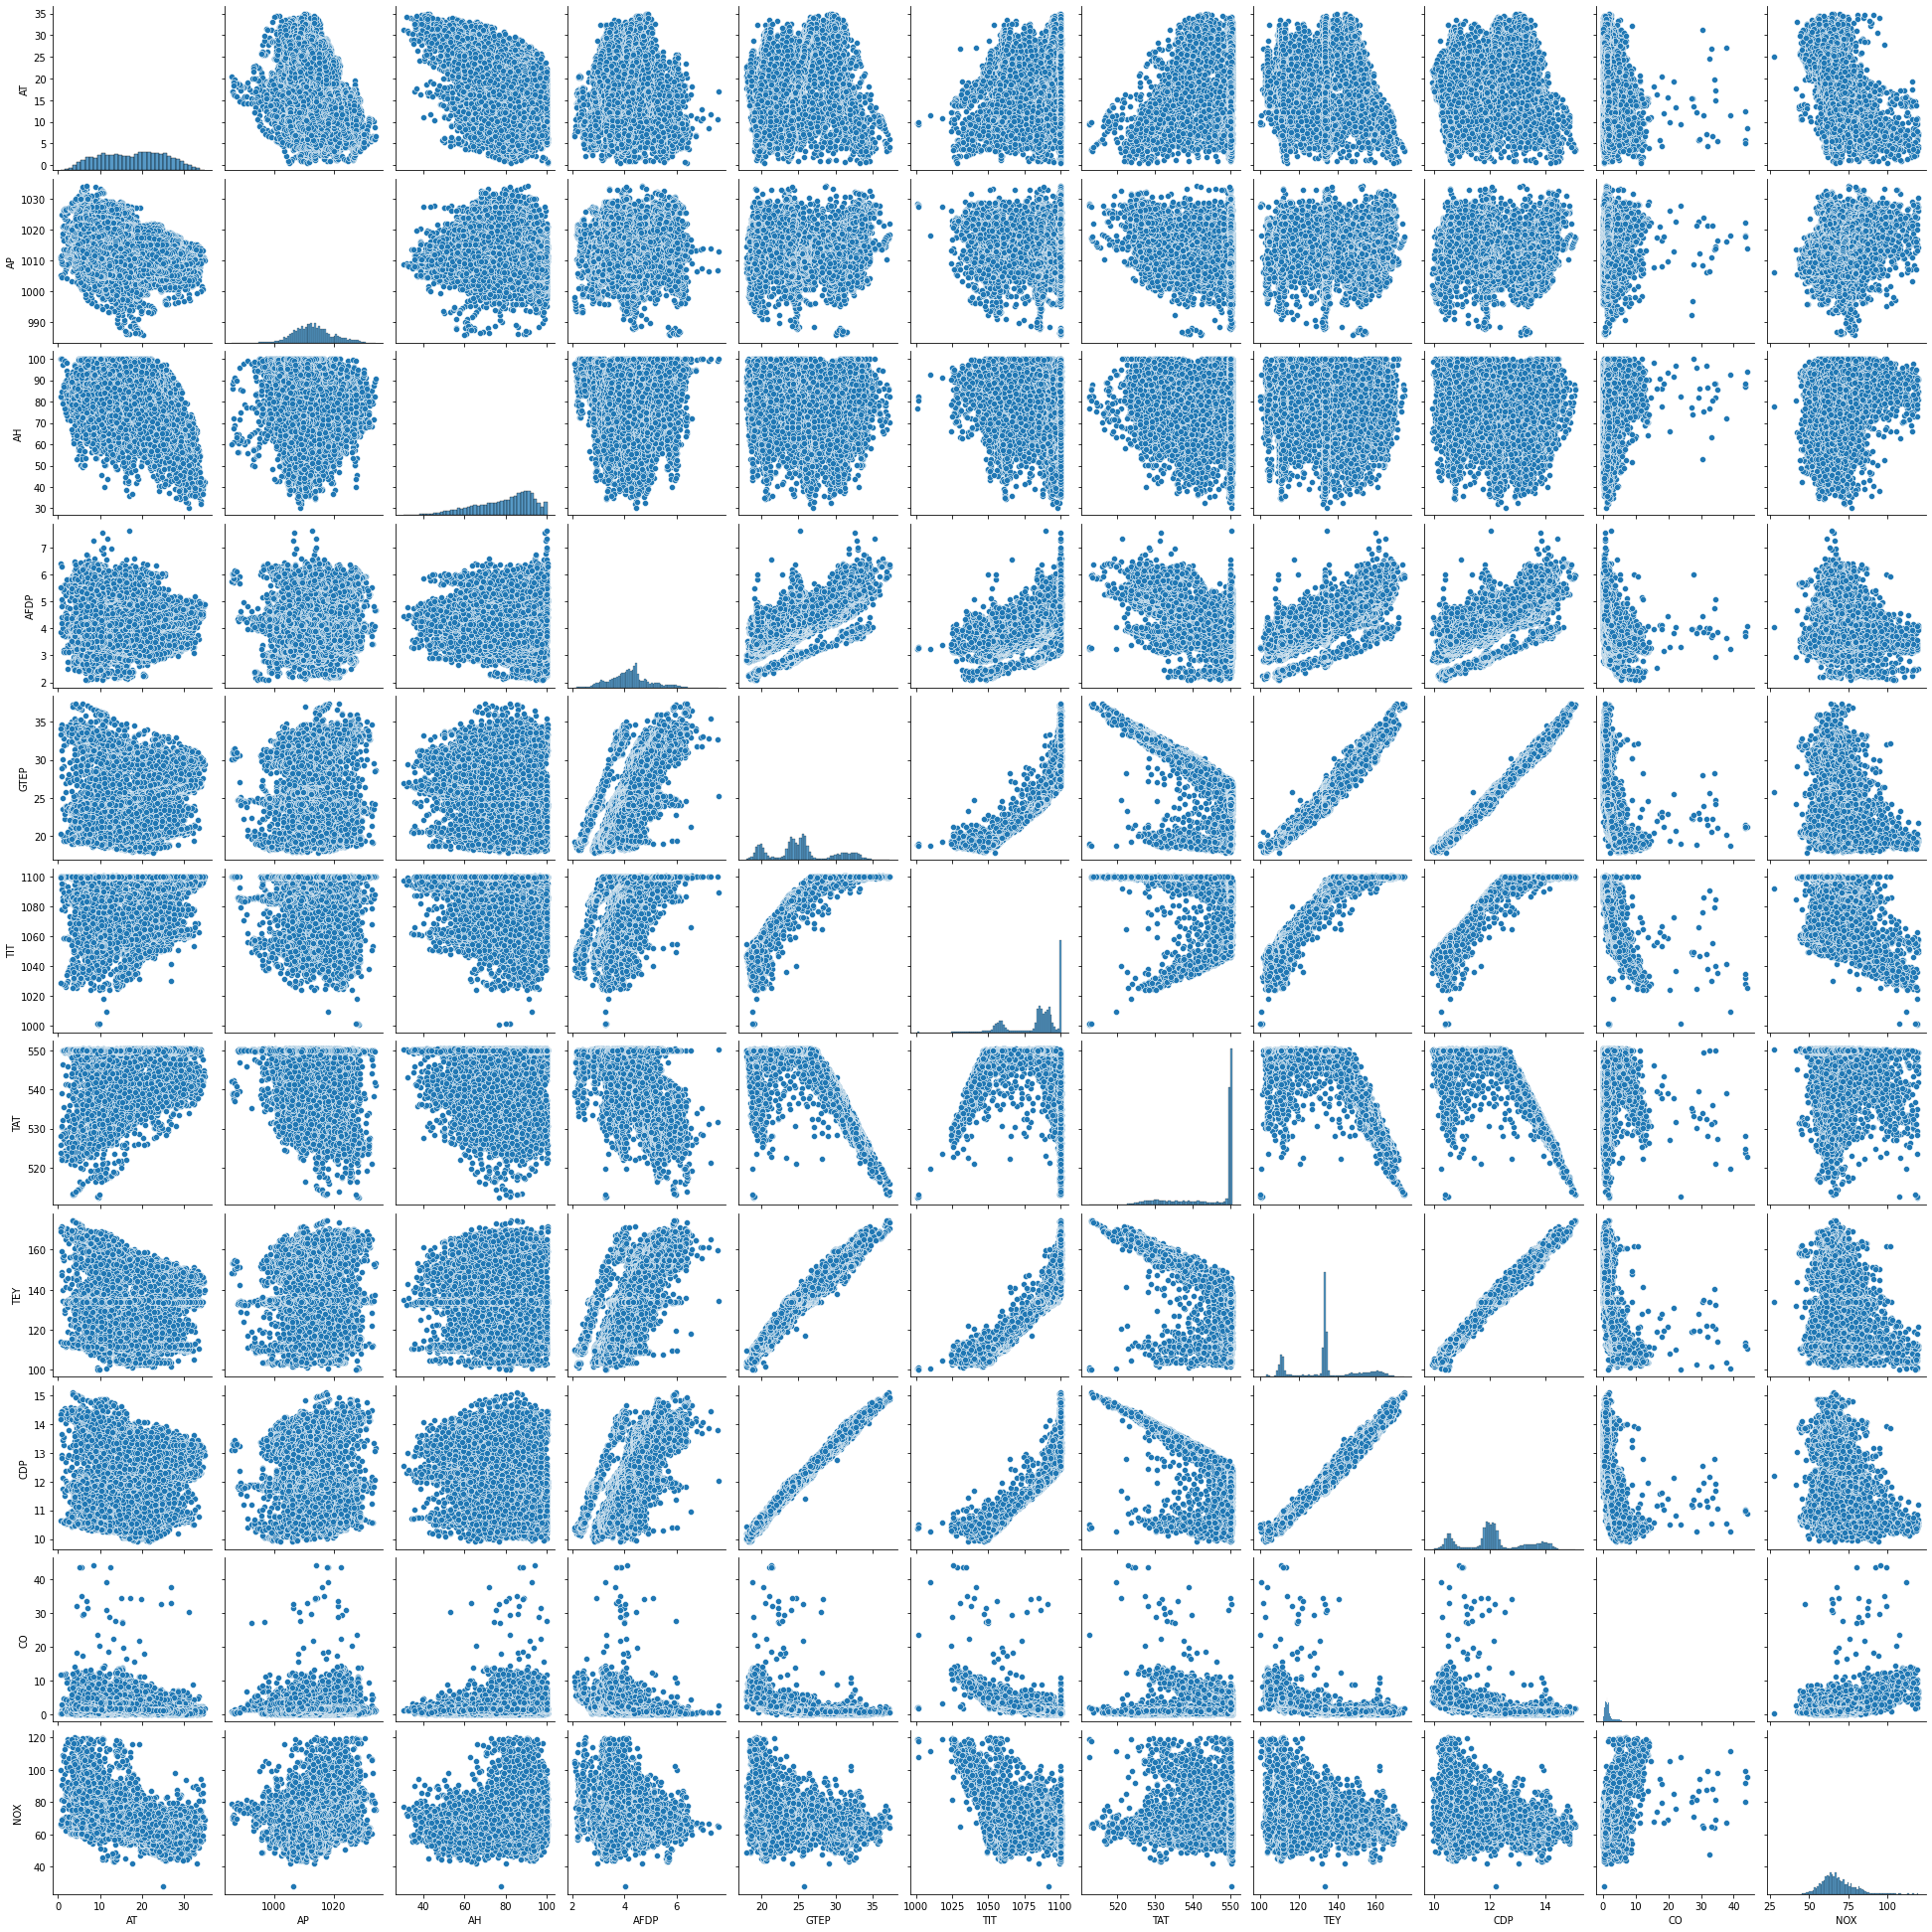

In [11]:
sns.pairplot(df)

<AxesSubplot:>

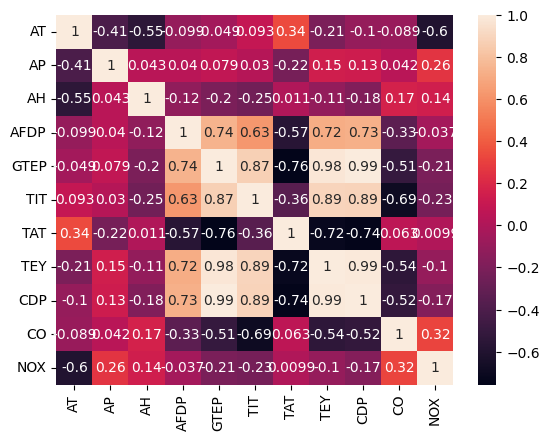

In [12]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='AT', ylabel='TEY'>

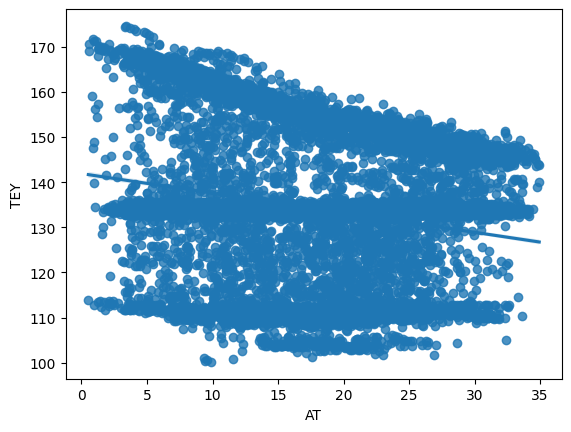

In [15]:
sns.regplot(df['AT'],df['TEY'])

<AxesSubplot:xlabel='AP', ylabel='TEY'>

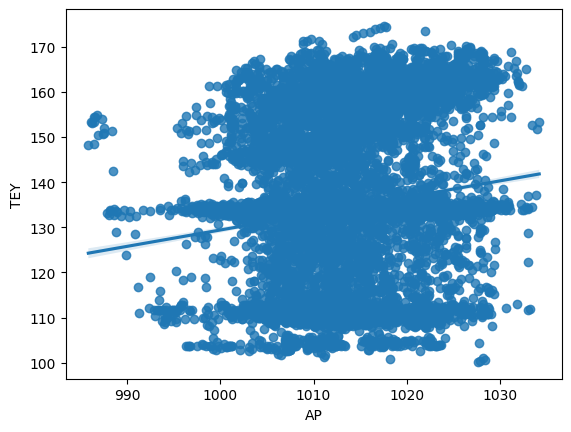

In [16]:
sns.regplot(df['AP'],df['TEY'])

<AxesSubplot:xlabel='AH', ylabel='TEY'>

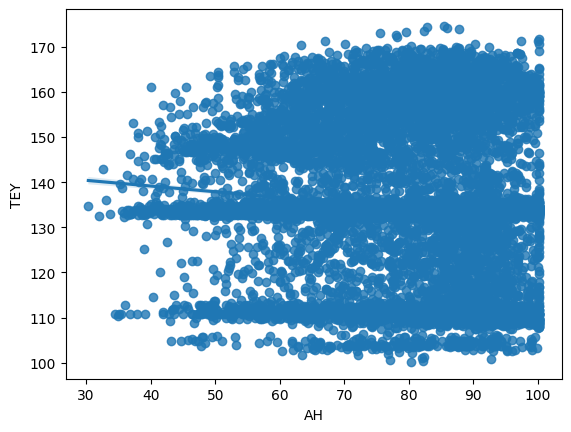

In [17]:
sns.regplot(df['AH'],df['TEY'])

### Dividing into X and Y variable

In [14]:
X = df.iloc[:,0:3]
Y = df.iloc[:,3]

### Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.values.reshape(len(Y),1))[:,0]

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=1)

In [21]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(10527, 3) (4512, 3) (10527,) (4512,)


### Backpropagation

In [22]:
from keras.models import Sequential
from keras.layers import Dense

#### Creating model

In [27]:
model = Sequential()
model.add(Dense(10, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

##### Compiling and fitting the model

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 1s 915us/step - loss: 1.0745 - mse: 1.0745
Epoch 2/100
264/264 [==============================] - 0s 858us/step - loss: 0.9471 - mse: 0.9471
Epoch 3/100
264/264 [==============================] - 0s 805us/step - loss: 0.9347 - mse: 0.9347
Epoch 4/100
264/264 [==============================] - 0s 828us/step - loss: 0.9291 - mse: 0.9291
Epoch 5/100
264/264 [==============================] - 0s 877us/step - loss: 0.9247 - mse: 0.9247
Epoch 6/100
264/264 [==============================] - 0s 816us/step - loss: 0.9231 - mse: 0.9231
Epoch 7/100
264/264 [==============================] - 0s 886us/step - loss: 0.9215 - mse: 0.9215
Epoch 8/100
264/264 [==============================] - 0s 795us/step - loss: 0.9200 - mse: 0.9200
Epoch 9/100
264/264 [==============================] - 0s 845us/step - loss: 0.9185 - mse: 0.9185
Epoch 10/100
264/264 [==============================] - 0s 835us/step - loss: 0.9172 - mse: 0.9172
Epoch 11/100
264/26

Epoch 84/100
264/264 [==============================] - 0s 826us/step - loss: 0.8898 - mse: 0.8898
Epoch 85/100
264/264 [==============================] - 0s 763us/step - loss: 0.8896 - mse: 0.8896
Epoch 86/100
264/264 [==============================] - 0s 771us/step - loss: 0.8902 - mse: 0.8902
Epoch 87/100
264/264 [==============================] - 0s 731us/step - loss: 0.8899 - mse: 0.8899
Epoch 88/100
264/264 [==============================] - 0s 733us/step - loss: 0.8902 - mse: 0.8902
Epoch 89/100
264/264 [==============================] - 0s 780us/step - loss: 0.8899 - mse: 0.8899
Epoch 90/100
264/264 [==============================] - 0s 756us/step - loss: 0.8893 - mse: 0.8893
Epoch 91/100
264/264 [==============================] - 0s 713us/step - loss: 0.8885 - mse: 0.8885
Epoch 92/100
264/264 [==============================] - 0s 745us/step - loss: 0.8884 - mse: 0.8884
Epoch 93/100
264/264 [==============================] - 0s 765us/step - loss: 0.8888 - mse: 0.8888
Epoch 94/1

### Tuning of Hyperparameters

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

In [31]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
66/66 [==============================] - 0s 849us/step
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.699 total time=  14.9s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
66/66 [==============================] - 0s 917us/step
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.534 total time=  14.3s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
66/66 [====================

66/66 [==============================] - 0s 756us/step
[CV 2/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.534 total time=  15.0s
[CV 3/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
66/66 [==============================] - 0s 973us/step
[CV 3/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.702 total time=  15.7s
[CV 4/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
66/66 [==============================] - 0s 761us/step
[CV 4/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.746 total time=  16.0s
[CV 5/5; 

66/66 [==============================] - 0s 832us/step
[CV 4/5; 9/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.746 total time=  15.3s
[CV 5/5; 9/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
66/66 [==============================] - 0s 1ms/step
[CV 5/5; 9/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.472 total time=  17.0s
[CV 1/5; 10/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
66/66 [==============================] - 0s 968us/step
[CV 1/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.699 total time=  16.6s
[CV 2/5; 

66/66 [==============================] - 0s 953us/step
[CV 1/5; 14/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.699 total time=  15.6s
[CV 2/5; 14/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
66/66 [==============================] - 0s 753us/step
[CV 2/5; 14/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.534 total time=  16.0s
[CV 3/5; 14/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
66/66 [==============================] - 0s 848us/step
[CV 3/5; 14/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.702 total time=  15.0s
[CV 4/5; 

66/66 [==============================] - 0s 1ms/step
[CV 3/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.702 total time=  33.2s
[CV 4/5; 18/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
66/66 [==============================] - 0s 1ms/step
[CV 4/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.746 total time=  33.2s
[CV 5/5; 18/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
66/66 [==============================] - 0s 785us/step
[CV 5/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.472 total time=  33.1

66/66 [==============================] - 0s 951us/step
[CV 5/5; 22/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.472 total time=  32.6s
[CV 1/5; 23/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
66/66 [==============================] - 0s 1ms/step
[CV 1/5; 23/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.699 total time=  33.8s
[CV 2/5; 23/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
66/66 [==============================] - 0s 849us/step
[CV 2/5; 23/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.534 total time=  35.2s
[

66/66 [==============================] - 0s 873us/step
[CV 2/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.534 total time=  32.1s
[CV 3/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
66/66 [==============================] - 0s 1ms/step
[CV 3/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.702 total time=  33.1s
[CV 4/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
66/66 [==============================] - 0s 689us/step
[CV 4/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.746 total time=  32.2s
[

66/66 [==============================] - 0s 754us/step
[CV 4/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.746 total time=  34.5s
[CV 5/5; 31/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
66/66 [==============================] - 0s 760us/step
[CV 5/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.472 total time=  32.4s
[CV 1/5; 32/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
66/66 [==============================] - 0s 746us/step
[CV 1/5; 32/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.699 total time=  32.0s
[CV 

66/66 [==============================] - 0s 1000us/step
[CV 1/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.699 total time=  17.3s
[CV 2/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
66/66 [==============================] - 0s 861us/step
[CV 2/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.534 total time=  16.4s
[CV 3/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
66/66 [==============================] - 0s 896us/step
[CV 3/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.702 total time=  17.4

66/66 [==============================] - 0s 1ms/step
[CV 3/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.702 total time=  17.3s
[CV 4/5; 40/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
66/66 [==============================] - 0s 1ms/step
[CV 4/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.746 total time=  17.8s
[CV 5/5; 40/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
66/66 [==============================] - 0s 726us/step
[CV 5/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.472 total time=  18.5s
[CV 1/5;

66/66 [==============================] - 0s 1ms/step
[CV 5/5; 44/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.472 total time=  19.8s
[CV 1/5; 45/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
66/66 [==============================] - 0s 1ms/step
[CV 1/5; 45/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.699 total time=  19.3s
[CV 2/5; 45/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
66/66 [==============================] - 0s 771us/step
[CV 2/5; 45/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.534 total time=  19.4s
[CV 3/5; 45/

66/66 [==============================] - 0s 890us/step
[CV 2/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.534 total time=  32.0s
[CV 3/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
66/66 [==============================] - 0s 721us/step
[CV 3/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.702 total time=  34.2s
[CV 4/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
66/66 [==============================] - 0s 726us/step
[CV 4/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-8.746 total time=  

66/66 [==============================] - 0s 636us/step
[CV 4/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.746 total time=  31.5s
[CV 5/5; 53/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
66/66 [==============================] - 0s 693us/step
[CV 5/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-8.472 total time=  33.2s
[CV 1/5; 54/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
66/66 [==============================] - 0s 773us/step
[CV 1/5; 54/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.699 total time=  42.7s

66/66 [==============================] - 0s 633us/step
[CV 1/5; 58/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.699 total time=  43.1s
[CV 2/5; 58/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
66/66 [==============================] - 0s 641us/step
[CV 2/5; 58/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.534 total time=  41.8s
[CV 3/5; 58/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
66/66 [==============================] - 0s 593us/step
[CV 3/5; 58/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.702 total time=  40.9s

66/66 [==============================] - 0s 737us/step
[CV 3/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.702 total time=  47.4s
[CV 4/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
66/66 [==============================] - 0s 731us/step
[CV 4/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.746 total time=  46.4s
[CV 5/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
66/66 [==============================] - 0s 977us/step
[CV 5/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-8.472 total time=  49.4s
[CV 

66/66 [==============================] - 0s 872us/step
[CV 5/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-8.472 total time=  11.1s
[CV 1/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
66/66 [==============================] - 0s 848us/step
[CV 1/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.699 total time=  10.6s
[CV 2/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
66/66 [==============================] - 0s 673us/step
[CV 2/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.534 total time=  10.4s

66/66 [==============================] - 0s 608us/step
[CV 2/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.534 total time=   9.5s
[CV 3/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
66/66 [==============================] - 0s 633us/step
[CV 3/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.702 total time=   9.6s
[CV 4/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
66/66 [==============================] - 0s 703us/step
[CV 4/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-8.746 total time=   9.7s
[CV 

66/66 [==============================] - 0s 660us/step
[CV 4/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.746 total time=  11.9s
[CV 5/5; 75/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
66/66 [==============================] - 0s 724us/step
[CV 5/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-8.472 total time=  10.2s
[CV 1/5; 76/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
66/66 [==============================] - 0s 1ms/step
[CV 1/5; 76/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.699 total time=  11.8s
[CV 2/

66/66 [==============================] - 0s 897us/step
[CV 1/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.699 total time=  12.1s
[CV 2/5; 80/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
66/66 [==============================] - 0s 946us/step
[CV 2/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.534 total time=  11.5s
[CV 3/5; 80/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
66/66 [==============================] - 0s 734us/step
[CV 3/5; 80/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-8.702 total time=  12.9s
[CV 4/5; 

66/66 [==============================] - 0s 877us/step
[CV 3/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.702 total time=  19.2s
[CV 4/5; 84/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
66/66 [==============================] - 0s 859us/step
[CV 4/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.746 total time=  19.0s
[CV 5/5; 84/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
66/66 [==============================] - 0s 741us/step
[CV 5/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-8.472 total time=  

KeyboardInterrupt: 

- taking lot of time, not finishing

#### Chooseing first 500 rows and applying gridsearch

In [33]:
X1 = X_scaled[0:500]
Y1 = Y_scaled[0:500] 

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, train_size = 0.8, random_state = 1)

In [34]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(X1_train, Y1_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   1.2s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.421 total time=   1.1s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================

3/3 [==============================] - 0s 1ms/step
[CV 4/5; 4/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.787 total time=   1.1s
[CV 5/5; 4/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 4/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.343 total time=   1.2s
[CV 1/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.409 total time=   1.2s
[CV 2/5; 5/256] ST

3/3 [==============================] - 0s 1ms/step
[CV 1/5; 9/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   1.1s
[CV 2/5; 9/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 9/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.421 total time=   1.0s
[CV 3/5; 9/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 9/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.860 total time=   1.0s
[CV 4/5; 9/256] START

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 13/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.860 total time=   1.1s
[CV 4/5; 13/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 13/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.787 total time=   1.0s
[CV 5/5; 13/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 13/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.343 total time=   1.1s
[CV 1/5; 14/256] STAR

3/3 [==============================] - 0s 3ms/step
[CV 5/5; 17/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.343 total time=   2.0s
[CV 1/5; 18/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 1/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.409 total time=   2.0s
[CV 2/5; 18/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 1ms/step
[CV 2/5; 18/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.421 total time=   2.0s
[CV 3/

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 22/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.421 total time=   1.8s
[CV 3/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 22/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.860 total time=   2.0s
[CV 4/5; 22/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 22/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.787 total time=   1.7s
[CV 5/5; 22

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 26/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.787 total time=   1.9s
[CV 5/5; 26/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 26/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.343 total time=   1.9s
[CV 1/5; 27/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 27/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.409 total time=   2.0s
[CV 2/5; 27

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.409 total time=   1.8s
[CV 2/5; 31/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.421 total time=   1.7s
[CV 3/5; 31/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 3/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.860 total time=   1.7s
[CV 4/5; 31/256]

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 35/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.860 total time=   1.1s
[CV 4/5; 35/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 35/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.787 total time=   1.2s
[CV 5/5; 35/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 35/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.343 total time=   1.1s
[CV 1/5; 36

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 39/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.343 total time=   1.2s
[CV 1/5; 40/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 1ms/step
[CV 1/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.409 total time=   1.2s
[CV 2/5; 40/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 40/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.421 total time=   1.1s
[CV 3/5; 40/256]

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 44/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.421 total time=   1.1s
[CV 3/5; 44/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 44/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.860 total time=   1.1s
[CV 4/5; 44/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 44/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.787 total time=   1.0s
[CV 5/5; 44/256]

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 48/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.787 total time=   1.2s
[CV 5/5; 48/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 48/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.343 total time=   1.2s
[CV 1/5; 49/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 1/5; 49/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   2.0s
[CV 2/5; 49/256

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.409 total time=   1.7s
[CV 2/5; 53/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.421 total time=   1.8s
[CV 3/5; 53/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 3/5; 53/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.860 total time=   1.8s
[CV 4/5; 53

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 57/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.860 total time=   2.0s
[CV 4/5; 57/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 57/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.787 total time=   1.9s
[CV 5/5; 57/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 57/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.343 total time=   1.8s
[CV 1/5; 58

3/3 [==============================] - 0s 3ms/step
[CV 5/5; 61/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.343 total time=   2.0s
[CV 1/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.409 total time=   2.1s
[CV 2/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 62/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.421 total time=   2.0s
[CV 3/5; 62/256]

3/3 [==============================] - 0s 1ms/step
[CV 2/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.421 total time=   0.8s
[CV 3/5; 66/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 980us/step
[CV 3/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.860 total time=   0.7s
[CV 4/5; 66/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.787 total time=   0.7s
[CV 5/5; 

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 70/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.787 total time=   0.8s
[CV 5/5; 70/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 70/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.343 total time=   0.8s
[CV 1/5; 71/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 1/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.409 total time=   0.8s
[CV 2/5; 71/256]

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.409 total time=   0.7s
[CV 2/5; 75/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.421 total time=   0.7s
[CV 3/5; 75/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 3/5; 75/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.860 total time=   0.8s
[CV 4/5; 75/256]

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 79/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.860 total time=   0.8s
[CV 4/5; 79/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 79/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.787 total time=   0.7s
[CV 5/5; 79/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 79/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.343 total time=   0.8s
[CV 1/5; 80/256] STAR

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 83/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.343 total time=   1.2s
[CV 1/5; 84/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.409 total time=   1.2s
[CV 2/5; 84/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 84/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.421 total time=   1.2s
[CV 3/

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 88/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.421 total time=   1.1s
[CV 3/5; 88/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 88/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.860 total time=   1.1s
[CV 4/5; 88/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 88/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.787 total time=   1.1s
[CV 5/5; 88

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.787 total time=   1.2s
[CV 5/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.343 total time=   1.2s
[CV 1/5; 93/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 5ms/step
[CV 1/5; 93/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.409 total time=   1.3s
[CV 2/5; 93/2

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   0.8s
[CV 2/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 2/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.421 total time=   0.7s
[CV 3/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.860 total time=   0.7s
[CV 4/5; 97

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 101/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.860 total time=   0.8s
[CV 4/5; 101/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 101/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.787 total time=   0.8s
[CV 5/5; 101/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 101/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.343 total time=   0.7s
[CV 1/5; 10

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 105/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.343 total time=   0.8s
[CV 1/5; 106/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 1ms/step
[CV 1/5; 106/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.409 total time=   0.8s
[CV 2/5; 106/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 106/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.421 total time=   0.9s
[CV 3/5; 10

3/3 [==============================] - 0s 3ms/step
[CV 2/5; 110/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.421 total time=   0.7s
[CV 3/5; 110/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 110/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.860 total time=   0.7s
[CV 4/5; 110/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 110/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.787 total time=   0.8s
[CV 5/5; 110/256

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 114/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.787 total time=   1.3s
[CV 5/5; 114/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 114/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.343 total time=   1.3s
[CV 1/5; 115/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 1/5; 115/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.409 total time=   1.3s
[

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 119/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.409 total time=   1.1s
[CV 2/5; 119/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 119/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.421 total time=   1.1s
[CV 3/5; 119/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 119/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.860 total time=   1.1s
[CV 4/

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.860 total time=   1.3s
[CV 4/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.787 total time=   1.2s
[CV 5/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.343 total time=   1.2s
[CV 1/

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 127/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.343 total time=   1.9s
[CV 1/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.409 total time=   1.3s
[CV 2/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 2/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.421 total time=   1.4s
[CV 3/5; 12

3/3 [==============================] - 0s 1ms/step
[CV 2/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.421 total time=   1.0s
[CV 3/5; 132/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.860 total time=   1.1s
[CV 4/5; 132/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.787 total time=   1

3/3 [==============================] - 0s 3ms/step
[CV 4/5; 136/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.787 total time=   1.3s
[CV 5/5; 136/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 136/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.343 total time=   1.3s
[CV 1/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   1.3s
[

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 141/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.409 total time=   1.2s
[CV 2/5; 141/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 141/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.421 total time=   1.1s
[CV 3/5; 141/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 141/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.860 total time=   1.1s
[CV 4/

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 145/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.860 total time=   2.3s
[CV 4/5; 145/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 145/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.787 total time=   2.2s
[CV 5/5; 145/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 5/5; 145/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.343 total time

3/3 [==============================] - 0s 1ms/step
[CV 5/5; 149/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.343 total time=   1.9s
[CV 1/5; 150/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 150/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.409 total time=   1.9s
[CV 2/5; 150/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 4ms/step
[CV 2/5; 150/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.421 total time=   2

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 154/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.421 total time=   2.0s
[CV 3/5; 154/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 154/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.860 total time=   2.1s
[CV 4/5; 154/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 154/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.787 total time=   2

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.787 total time=   2.1s
[CV 5/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 5/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.343 total time=   2.2s
[CV 1/5; 159/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 1/5; 159/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.409 total time=   2.3s
[

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.409 total time=   1.1s
[CV 2/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.421 total time=   1.2s
[CV 3/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.860 total time=   1

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.860 total time=   1.4s
[CV 4/5; 167/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 7ms/step
[CV 4/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.787 total time=   1.3s
[CV 5/5; 167/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.343 total time=   1.2s
[

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 171/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.343 total time=   1.0s
[CV 1/5; 172/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.409 total time=   1.0s
[CV 2/5; 172/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.421 total time=   1.1s
[

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 176/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.421 total time=   1.3s
[CV 3/5; 176/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 7ms/step
[CV 3/5; 176/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.860 total time=   1.2s
[CV 4/5; 176/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 176/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.787 total time=   1.4s
[CV 5/

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 180/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.787 total time=   2.0s
[CV 5/5; 180/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 180/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.343 total time=   2.0s
[CV 1/5; 181/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 7ms/step
[CV 1/5; 181/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.409 total time= 

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   1.9s
[CV 2/5; 185/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 2/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.421 total time=   2.0s
[CV 3/5; 185/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 185/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.860 total time=   1

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 189/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.860 total time=   2.0s
[CV 4/5; 189/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 189/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.787 total time=   2.0s
[CV 5/5; 189/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 189/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.343 total time=   2.1s
[

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 193/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.343 total time=   0.8s
[CV 1/5; 194/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 194/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.409 total time=   0.7s
[CV 2/5; 194/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 194/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.421 total time=   0

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 198/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.421 total time=   0.8s
[CV 3/5; 198/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 198/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.860 total time=   0.8s
[CV 4/5; 198/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 3ms/step
[CV 4/5; 198/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.787 total time=   0.8s
[

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.787 total time=   0.7s
[CV 5/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.343 total time=   0.8s
[CV 1/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 203/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.409 total time=   0.7s
[

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.409 total time=   0.8s
[CV 2/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.421 total time=   0.8s
[CV 3/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.860 total time=   0.8s
[CV 4/

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 211/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.860 total time=   1.2s
[CV 4/5; 211/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 211/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.787 total time=   1.2s
[CV 5/5; 211/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 5/5; 211/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.343 total time

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 215/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.343 total time=   1.4s
[CV 1/5; 216/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 216/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.409 total time=   1.3s
[CV 2/5; 216/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 216/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.421 total time=   1

3/3 [==============================] - 0s 3ms/step
[CV 2/5; 220/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.421 total time=   2.0s
[CV 3/5; 220/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 220/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.860 total time=   1.3s
[CV 4/5; 220/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
3/3 [==============================] - 0s 1ms/step
[CV 4/5; 220/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-2.787 total time=   1

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 224/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.787 total time=   1.2s
[CV 5/5; 224/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 224/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-2.343 total time=   1.1s
[CV 1/5; 225/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 225/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.409 total time=   0.7s

3/3 [==============================] - 0s 2ms/step
[CV 1/5; 229/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.409 total time=   0.8s
[CV 2/5; 229/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 229/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.421 total time=   0.8s
[CV 3/5; 229/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 229/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.860 total time=   0.8s
[

3/3 [==============================] - 0s 1ms/step
[CV 3/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.860 total time=   0.9s
[CV 4/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.787 total time=   0.9s
[CV 5/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
3/3 [==============================] - 0s 3ms/step
[CV 5/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-2.343 total time=   0.8s
[

3/3 [==============================] - 0s 2ms/step
[CV 5/5; 237/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-2.343 total time=   1.2s
[CV 1/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.409 total time=   0.8s
[CV 2/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.421 total time=   0.9s
[CV 3/

3/3 [==============================] - 0s 2ms/step
[CV 2/5; 242/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.421 total time=   1.2s
[CV 3/5; 242/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 242/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.860 total time=   1.2s
[CV 4/5; 242/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 4/5; 242/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-2.787 total time

3/3 [==============================] - 0s 2ms/step
[CV 4/5; 246/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.787 total time=   1.2s
[CV 5/5; 246/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 246/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-2.343 total time=   1.1s
[CV 1/5; 247/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 1/5; 247/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.409 total time=   1

3/3 [==============================] - 1s 3ms/step
[CV 1/5; 251/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.409 total time=   2.8s
[CV 2/5; 251/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 2/5; 251/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.421 total time=   2.1s
[CV 3/5; 251/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 3/5; 251/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-2.860 total time=   1

3/3 [==============================] - 0s 2ms/step
[CV 3/5; 255/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.860 total time=   1.2s
[CV 4/5; 255/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 1ms/step
[CV 4/5; 255/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.787 total time=   1.2s
[CV 5/5; 255/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
3/3 [==============================] - 0s 2ms/step
[CV 5/5; 255/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-2.343 total time=   1.1s
[

### So, we got, Best : -2.5640034253073294, using {'activation_function': 'relu', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}

#### Creating final model

In [35]:
final_model = Sequential()
final_model.add(Dense(4,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))
    
adam=adam_v2.Adam(learning_rate = 0.01)

In [36]:
# Compile Model
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

In [37]:
# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9995 - mse: 0.9995
Epoch 2/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9992 - mse: 0.9992
Epoch 3/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9991 - mse: 0.9991
Epoch 4/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9991 - mse: 0.9991
Epoch 5/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9987 - mse: 0.9987
Epoch 6/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9993 - mse: 0.9993
Epoch 7/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9999 - mse: 0.9999
Epoch 8/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9996 - mse: 0.9996
Epoch 9/50
527/527 [==============================] - 1s 3ms/step - loss: 0.9992 - mse: 0.9992
Epoch 10/50
527/527 [==============================] - 1s 1ms/step - loss: 0.9988 - mse: 0.9988
Epoch 11/50
527/527 [============================

In [38]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

141/141 [==============================] - 0s 1ms/step - loss: 1.0075 - mse: 1.0075
mse
